#Marketing Analytics & Statistical Analysis

##Data Analysis - BUHI Supply Co.

###Perform Data Analysis on dataset "Optimize for Conversion.csv"

####Dataset: Provided by [Stukent](https://www.stukent.com/) | Digital Marketing Analytics Simternship - California State Univeristy, East Bay


###Objectives
Our goal is to maximize the number of conversions across all campaigns using a minimum budget of $20,000, ensuring funds are allocated strategically based on Cost Per Click (CPC) and other campaign constraints.

* We will also analyze historical data to understand campaign performance trends across key metrics like conversions, impressions, CPC, and cost.

* Identify top-performing campaigns in terms of both efficiency (low CPC) and effectiveness (high conversions).

* Use CPC metrics to predict outcomes from allocated budgets.

* Prioritize campaigns that offer the most cost-effective conversions.

####Constraints:
* Spend no more than $3,000 allocated to any single campaign.
Consider each campaign’s recommended budget max.

##Libraries, Directory, Data

By exploring the data, our data consists of one .csv file containing the following features:

* Campaign
* Campaign Type
* Source (Paid, Owned, Earned Media)
* Clicks
* Conversions
* Conversion Rate
* Impressions
* Cost
* Click-Through-Rate (CTR)
* Input Budget
* Recommended Budget Max

In [5]:
%cd /content/drive/MyDrive/Assignments/Stukent - Data Analysis | Seminar in Digital Mktg/Conversion Rate

/content/drive/MyDrive/Assignments/Stukent - Data Analysis | Seminar in Digital Mktg/Conversion Rate


In [2]:
#Install needed libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
!pip install seaborn
!pip install plotly
!install ace_tools

install: missing destination file operand after 'ace_tools'
Try 'install --help' for more information.


In [6]:
#Load the data
conversion_df = pd.read_csv('Optimize_for_Conversions.csv')
conversion_df.head()

,Campaign Type,Source,Campaign,Input Budget,Cost per Impression,Impressions,CTR,Clicks,CPC,Cost,Recommended Budget Max,Conversions,Conversion Rate
0,Affiliate,Clickbank,Tote,112,0.04,2811,0.01,24,4.40,104,2657.0,2,0.07
1,Affiliate,Clickbank,Satchel,108,0.04,2513,0.01,28,3.55,98,1489.0,1,0.05
2,Affiliate,Clickbank,Purse,126,0.04,3486,0.01,32,3.85,122,1646.0,2,0.07
3,Affiliate,Shareasale,Purse,151,0.03,5560,0.01,37,3.73,139,460.0,3,0.07
4,Display,Retargeting,Yellow Backpack,295,0.01,35750,0.00,39,7.27,286,782.0,1,0.02


#Check for missing data

In [7]:
conversion_df.isnull().sum()

,0
Campaign Type,0
Source,0
Campaign,0
Input Budget,0
Cost per Impression,0
Impressions,0
CTR,0
Clicks,0
CPC,0
Cost,0


#Describe the data

In [8]:
conversion_df.describe()

,Input Budget,Cost per Impression,Impressions,CTR,Clicks,CPC,Cost,Recommended Budget Max,Conversions,Conversion Rate
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,221.283333,0.020583,35255.066667,0.010250,164.591667,2.025417,210.516667,1664.516667,5.041667,0.040000
std,65.365576,0.013366,64338.268411,0.007499,200.043924,1.090299,63.029003,837.843621,3.979772,0.021615
min,102.000000,0.000000,2513.000000,0.000000,24.000000,0.190000,95.000000,331.000000,1.000000,0.010000
25%,166.250000,0.010000,6227.000000,0.010000,70.750000,1.260000,158.500000,830.250000,2.000000,0.020000
50%,226.000000,0.020000,9131.000000,0.010000,105.500000,1.915000,219.000000,1713.000000,4.000000,0.040000
75%,291.000000,0.030000,27197.250000,0.010000,165.500000,2.595000,274.250000,2476.750000,7.000000,0.050000
max,300.000000,0.050000,289000.000000,0.030000,1479.000000,7.270000,298.000000,2989.000000,30.000000,0.080000


In [9]:
conversion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Campaign Type           120 non-null    object 
 1   Source                  120 non-null    object 
 2   Campaign                120 non-null    object 
 3   Input Budget            120 non-null    int64  
 4   Cost per Impression     120 non-null    float64
 5   Impressions             120 non-null    int64  
 6   CTR                     120 non-null    float64
 7   Clicks                  120 non-null    int64  
 8   CPC                     120 non-null    float64
 9   Cost                    120 non-null    int64  
 10  Recommended Budget Max  120 non-null    float64
 11  Conversions             120 non-null    int64  
 12  Conversion Rate         120 non-null    float64
dtypes: float64(5), int64(5), object(3)
memory usage: 12.3+ KB


In [10]:
conversion_df.dtypes

,0
Campaign Type,object
Source,object
Campaign,object
Input Budget,int64
Cost per Impression,float64
Impressions,int64
CTR,float64
Clicks,int64
CPC,float64
Cost,int64


In [11]:
conversion_df.shape

(120, 13)

In [12]:
conversion_df.columns

Index(['Campaign Type', 'Source', 'Campaign', 'Input Budget',
       'Cost per Impression', 'Impressions', 'CTR', 'Clicks', 'CPC', 'Cost',
       'Recommended Budget Max', 'Conversions', 'Conversion Rate'],
      dtype='object')

#Detect Outliers

Impressions: 


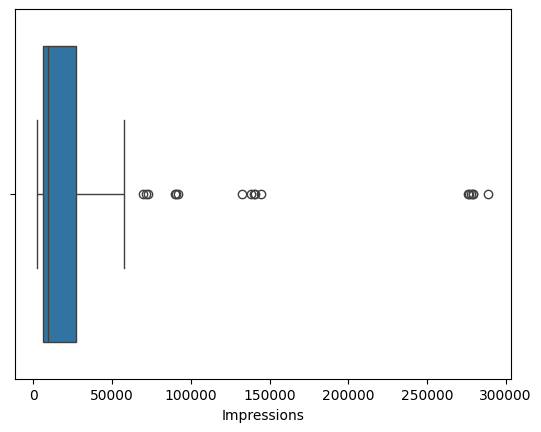

Conversions: 


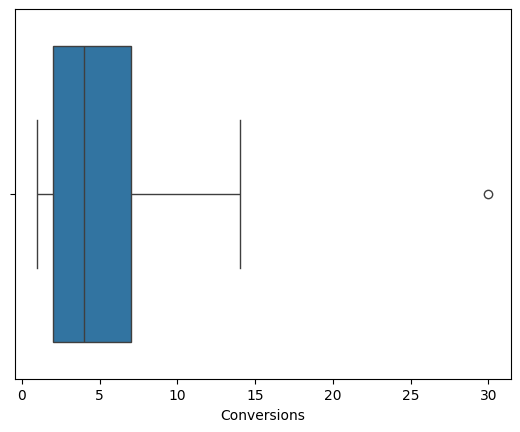

CPC: 


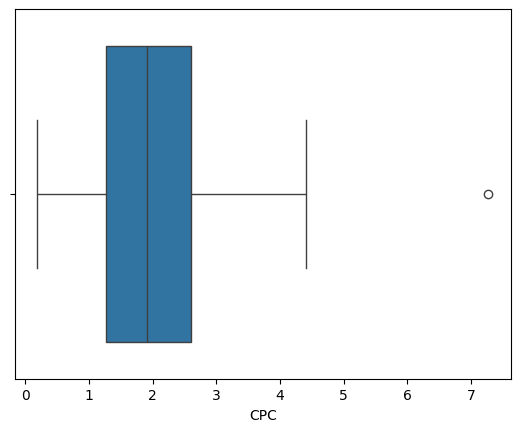

Conversion Rate: 


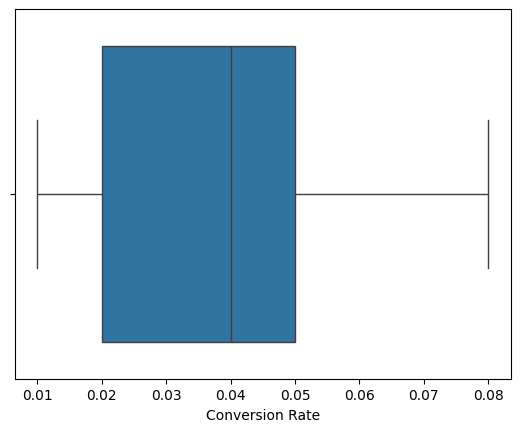

In [13]:
list1 = ['Impressions', 'Conversions', 'CPC', 'Conversion Rate']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=conversion_df[str(i)])
    plt.show()

#Removing Outliers

In [14]:
# Calculate Z-scores
conversion_df['Z_Score'] = zscore(conversion_df['Impressions'])

# Filter out outliers (absolute z-score > 3)
df_no_outliers = conversion_df[abs(conversion_df['Z_Score']) <= 3]

print(df_no_outliers)


    Campaign Type       Source         Campaign  Input Budget  \
0       Affiliate    Clickbank             Tote           112   
1       Affiliate    Clickbank          Satchel           108   
2       Affiliate    Clickbank            Purse           126   
3       Affiliate   Shareasale            Purse           151   
4         Display  Retargeting  Yellow Backpack           295   
..            ...          ...              ...           ...   
109       Display       Google    Blue Backpack           293   
110       Display  Retargeting       Travel Bag           293   
112       Display  Retargeting    Blue Backpack           290   
113       Display  Retargeting             Tote           297   
115       Display  Retargeting      Rolling Bag           290   

     Cost per Impression  Impressions   CTR  Clicks   CPC  Cost  \
0                   0.04         2811  0.01      24  4.40   104   
1                   0.04         2513  0.01      28  3.55    98   
2                 

In [15]:
# Calculate Q1, Q3, and IQR
Q1 = conversion_df['Impressions'].quantile(0.25)
Q3 = conversion_df['Impressions'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [16]:
# Verify if any outliers remain
outliers_remaining = df_no_outliers[(df_no_outliers['Impressions'] < lower_bound) | (df_no_outliers['Impressions'] > upper_bound)]
if outliers_remaining.empty:
    print("No outliers remaining.")
else:
    print("Outliers detected:\n", outliers_remaining)


Outliers detected:
     Campaign Type       Source         Campaign  Input Budget  \
34        Display      YouTube    Blue Backpack           297   
55        Display      YouTube            Pouch           296   
83        Display      YouTube  Yellow Backpack           295   
94        Display  Retargeting            Pouch           295   
96        Display       Google      Rolling Bag           293   
104       Display      YouTube          Satchel           296   
106       Display       Google             Tote           300   
109       Display       Google    Blue Backpack           293   
112       Display  Retargeting    Blue Backpack           290   
113       Display  Retargeting             Tote           297   
115       Display  Retargeting      Rolling Bag           290   

     Cost per Impression  Impressions   CTR  Clicks   CPC  Cost  \
34                   0.0        69500  0.00      76  3.64   278   
55                   0.0        72500  0.00     102  2.86   290  

In [17]:
# Replace outliers with median
median = conversion_df['Impressions'].median()
conversion_df['Impressions'] = np.where((conversion_df['Impressions'] < lower_bound) | (conversion_df['Impressions'] > upper_bound), median, conversion_df['Impressions'])

# Confirm all values are within bounds
outliers_remaining = conversion_df[(conversion_df['Impressions'] < lower_bound) | (conversion_df['Impressions'] > upper_bound)]
if outliers_remaining.empty:
    print("No outliers remaining after replacement.")
else:
    print("Outliers detected:\n", outliers_remaining)


No outliers remaining after replacement.


#Data Analysis

In [18]:
# Calculate the average conversions per campaign
average_conversions = conversion_df['Conversions'].mean()
average_conversions


5.041666666666667

The average conversions per campaign in your dataset are approximately **5.04**
conversions per campaign.

In [19]:
# Identify the campaign with the most conversions
max_conversions_row = conversion_df.loc[conversion_df['Conversions'].idxmax()]

campaign_with_max_conversions = max_conversions_row['Campaign']
max_conversions = max_conversions_row['Conversions']

campaign_with_max_conversions, max_conversions


('Satchel', 30)

The campaign with the most conversions is **"Satchel"**, which generated **30 conversions**.



In [20]:
# Count the number of campaigns that generated only a single conversion
single_conversion_campaigns = conversion_df[conversion_df['Conversions'] == 1].shape[0]

single_conversion_campaigns


17

There are **17** campaigns that generated only a single conversion.

In [21]:
# Calculate the overall cost per acquisition (CPA)
# CPA is typically calculated as Total Cost / Total Conversions
total_cost = conversion_df['Cost'].sum()
total_conversions = conversion_df['Conversions'].sum()

overall_cpa = total_cost / total_conversions if total_conversions > 0 else 0

overall_cpa


41.75537190082645

The overall cost per acquisition (CPA) is approximately **$41.76**.

In [22]:
# Calculate CPA for each campaign
conversion_df['CPA'] = conversion_df['Cost'] / conversion_df['Conversions']

# Identify the campaign with the lowest CPA
lowest_cpa_row = conversion_df.loc[conversion_df['CPA'].idxmin()]

campaign_with_lowest_cpa = lowest_cpa_row['Campaign']
lowest_cpa = lowest_cpa_row['CPA']
cost_of_lowest_cpa_campaign = lowest_cpa_row['Cost']

campaign_with_lowest_cpa, lowest_cpa, cost_of_lowest_cpa_campaign


('Satchel', 9.3, 279)

The campaign with the lowest cost per acquisition (CPA) is **"Satchel"**, with a CPA of **$9.30** and the total cost of **279**.

In [23]:
# Identify the campaign with the highest CPA
highest_cpa_row = conversion_df.loc[conversion_df['CPA'].idxmax()]

campaign_with_highest_cpa = highest_cpa_row['Campaign']
highest_cpa = highest_cpa_row['CPA']
cost_of_highest_cpa_campaign = highest_cpa_row['Cost']

campaign_with_highest_cpa, highest_cpa, cost_of_highest_cpa_campaign


('Purse', 296.0, 296)

The campaign with the highest cost per acquisition (CPA) is **"Purse"**, with a CPA of **$296.00** and a total cost of **296**.



#Visualization

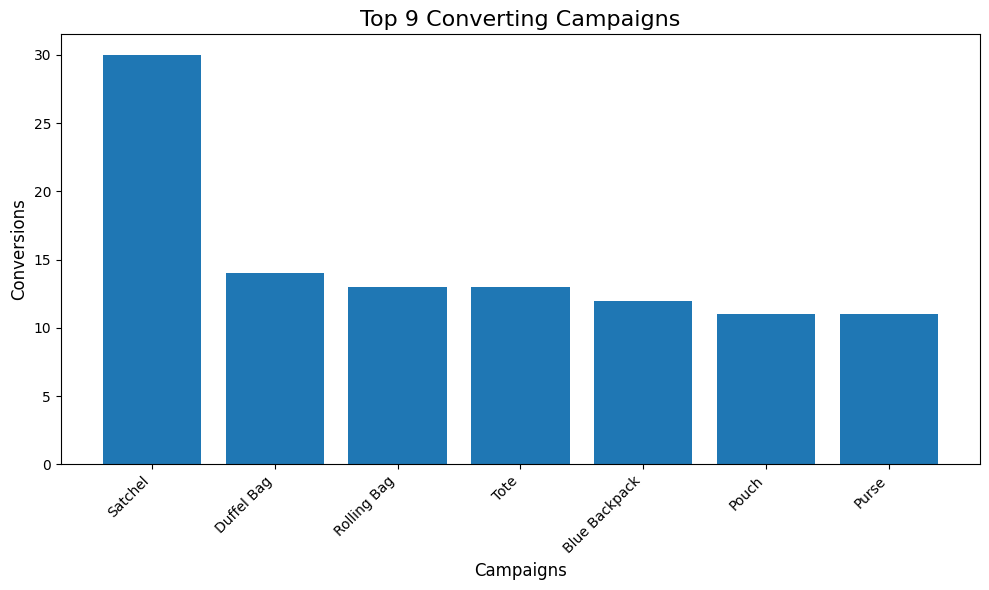

In [24]:
# Select the top nine converting campaigns
top_converting_campaigns = conversion_df.nlargest(9, 'Conversions')

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_converting_campaigns['Campaign'], top_converting_campaigns['Conversions'])
plt.title('Top 9 Converting Campaigns', fontsize=16)
plt.xlabel('Campaigns', fontsize=12)
plt.ylabel('Conversions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


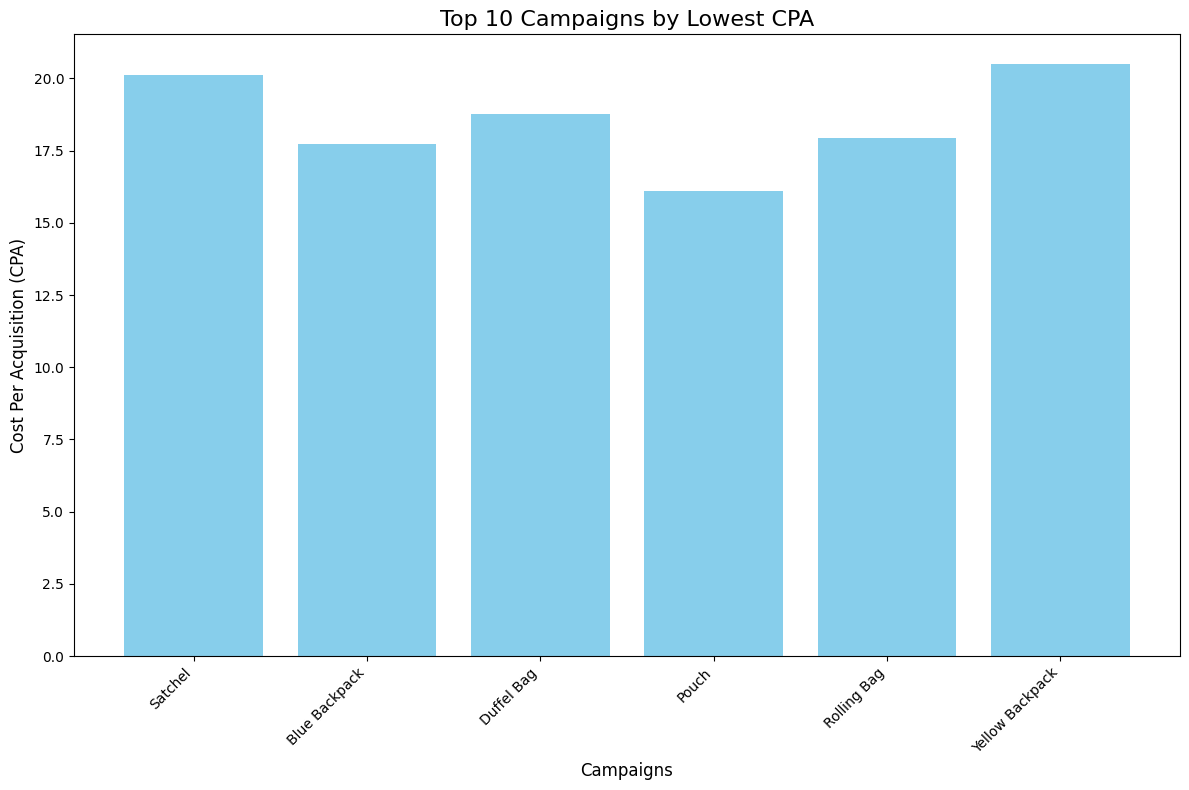

In [26]:
# Select the top ten campaigns with the lowest CPA
top_cpa_campaigns = conversion_df.nsmallest(10, 'CPA')

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_cpa_campaigns['Campaign'], top_cpa_campaigns['CPA'], color='skyblue')
plt.title('Top 10 Campaigns by Lowest CPA', fontsize=16)
plt.xlabel('Campaigns', fontsize=12)
plt.ylabel('Cost Per Acquisition (CPA)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#Forecasting a marketing campaign

How many conversions **"Display / Retargeting / Satchel"** campaign will receive if we allocated **$100** to it. We will base our forecast on historical data.



In [27]:
# Filter data for the "Display / Retargeting / Satchel" campaign
campaign_data = conversion_df[(conversion_df['Campaign'] == "Satchel") &
                     (conversion_df['Source'] == "Retargeting") &
                     (conversion_df['Campaign Type'] == "Display")]

# Ensure the campaign exists in the dataset
if not campaign_data.empty:
    # Calculate the cost per conversion for this campaign
    cost_per_conversion = campaign_data['Cost'].sum() / campaign_data['Conversions'].sum()

    # Forecast conversions for a $100 budget
    forecasted_conversions = 100 / cost_per_conversion if cost_per_conversion > 0 else 0

    cost_per_conversion, forecasted_conversions
else:
    "Campaign not found in the dataset."


In [28]:
campaign_data.head()

,Campaign Type,Source,Campaign,Input Budget,Cost per Impression,Impressions,CTR,Clicks,CPC,Cost,Recommended Budget Max,Conversions,Conversion Rate,Z_Score,CPA
119,Display,Retargeting,Satchel,297,0.0,9131.0,0.01,1479,0.19,279,1344.0,30,0.02,3.804375,9.3


We would generate **30 conversions** with an average CPA of 9.3, If we allocate $100 to "Display / Retargeting / Satchel".

#Budget Allocation Strategy

Maximize conversions while adhering to financial and performance constraints. Below are the key components of this approach:

####1. Prioritizing Cost Efficiency
Campaigns are ranked based on their cost per acquisition (CPA), as campaigns with lower CPAs deliver more conversions per dollar. By focusing on these campaigns, the strategy ensures the best return on investment (ROI) for the allocated budget.

####2. Maximizing Conversions
Funds are directed toward campaigns with the lowest CPA first, ensuring that each dollar spent generates the maximum possible number of conversions. Higher CPA campaigns are considered only after allocating to the most efficient campaigns.



In [29]:
# Sort campaigns by CPA to prioritize lower CPA
sorted_campaigns = conversion_df.sort_values(by='CPA')

# Initialize variables for budget allocation
total_budget = 14000
max_budget_per_campaign = 3000

# Allocate funds to campaigns based on CPA and recommended budget max
allocation = []
remaining_budget = total_budget

for _, campaign in sorted_campaigns.iterrows():
    # Determine the maximum allocatable budget for this campaign
    recommended_budget = campaign['Recommended Budget Max']
    allocatable_budget = min(max_budget_per_campaign, recommended_budget, remaining_budget)

    if allocatable_budget > 0:
        # Append allocation details
        allocation.append({
            "Campaign": campaign['Campaign'],
            "Channel": campaign['Source'],
            "Allocated Budget": allocatable_budget,
            "Estimated Conversions": allocatable_budget / campaign['CPA']
        })
        # Deduct from the remaining budget
        remaining_budget -= allocatable_budget

    # Break if no budget is left
    if remaining_budget <= 0:
        break

# Convert allocation details to a DataFrame for presentation
allocation_df = pd.DataFrame(allocation)

In [30]:
sorted_campaigns.head(8)

,Campaign Type,Source,Campaign,Input Budget,Cost per Impression,Impressions,CTR,Clicks,CPC,Cost,Recommended Budget Max,Conversions,Conversion Rate,Z_Score,CPA
119,Display,Retargeting,Satchel,297,0.00,9131.0,0.01,1479,0.19,279,1344.0,30,0.02,3.804375,9.300000
93,Paid Search,Bing,Blue Backpack,175,0.02,7130.0,0.02,176,0.93,164,1912.0,12,0.07,-0.438977,13.666667
108,Paid Social,Instagram,Duffel Bag,234,0.01,21200.0,0.01,312,0.68,212,1285.0,14,0.05,-0.219372,15.142857
99,Paid Search,Bing,Satchel,196,0.02,8727.0,0.02,213,0.90,192,2906.0,12,0.06,-0.414051,16.000000
80,Affiliate,Clickbank,Pouch,188,0.01,13615.0,0.01,139,1.27,177,744.0,11,0.08,-0.337759,16.090909
102,Paid Social,Twitter,Blue Backpack,208,0.01,19500.0,0.01,252,0.78,195,2155.0,11,0.04,-0.245905,17.727273
103,Paid Search,Google,Rolling Bag,235,0.03,8630.0,0.03,257,0.91,233,2911.0,13,0.05,-0.415565,17.923077
90,Paid Search,Google,Duffel Bag,179,0.03,6500.0,0.03,167,1.01,169,2121.0,9,0.05,-0.448810,18.777778


In [31]:
allocation_df.head(8)

,Campaign,Channel,Allocated Budget,Estimated Conversions
0,Satchel,Retargeting,1344.0,144.516129
1,Blue Backpack,Bing,1912.0,139.902439
2,Duffel Bag,Instagram,1285.0,84.858491
3,Satchel,Bing,2906.0,181.625000
4,Pouch,Clickbank,744.0,46.237288
5,Blue Backpack,Twitter,2155.0,121.564103
6,Rolling Bag,Google,2911.0,162.416309
7,Duffel Bag,Google,743.0,39.568047


#Results

In [32]:
#Load the campaign data results
results_df = pd.read_csv('DMA-Campaign-Data-2.csv')
results_df

,Campaign Type,Source,Campaign,Cost Per Impression,Impressions,CTR,Clicks,CPC,Cost,Allocated Budget,Conversions,CPA (Cost Per Conversion),Conversion Rate,Average Revenue Per Conversion,Revenue,Margin,Profits
0,Display,Retargeting,Satchel,$0.0006,2180160,0.53%,11555,$0.11,"$1,304.83","$1,344.00",231,$5.65,2.00%,$157.00,"$36,282.23",71.00%,"$25,760.38"
1,Paid Search,Bing,Blue Backpack,$0.0138,133315,2.47%,3293,$0.56,"$1,835.15","$1,912.00",223,$8.23,6.77%,$52.00,"$11,592.26",64.00%,"$7,419.04"
2,Paid Social,Instagram,Duffel Bag,$0.0060,205136,1.47%,3016,$0.41,"$1,227.74","$1,285.00",139,$8.81,4.62%,$156.00,"$21,733.35",48.00%,"$10,432.01"
3,Paid Search,Bing,Satchel,$0.0132,210815,2.44%,5144,$0.54,"$2,775.80","$2,906.00",289,$9.62,5.61%,$81.00,"$23,374.36",86.00%,"$20,101.95"
4,Affiliate,Clickbank,Pouch,$0.0078,90885,1.02%,927,$0.76,$707.13,$744.00,72,$9.79,7.79%,$60.00,"$4,332.93",87.00%,"$3,769.65"
5,Paid Social,Twitter,Blue Backpack,$0.0060,359968,1.29%,4644,$0.46,"$2,154.41","$2,155.00",205,$10.50,4.42%,$61.00,"$12,520.04",84.00%,"$10,516.84"
6,Paid Search,Google,Rolling Bag,$0.0162,172261,2.98%,5133,$0.54,"$2,783.65","$2,911.00",262,$10.61,5.11%,$49.00,"$12,853.47",62.00%,"$7,969.15"
7,Paid Search,Google,Duffel Bag,$0.0156,44880,2.57%,1153,$0.61,$698.39,$743.00,59,$11.85,5.11%,$65.00,"$3,831.11",59.00%,"$2,260.36"


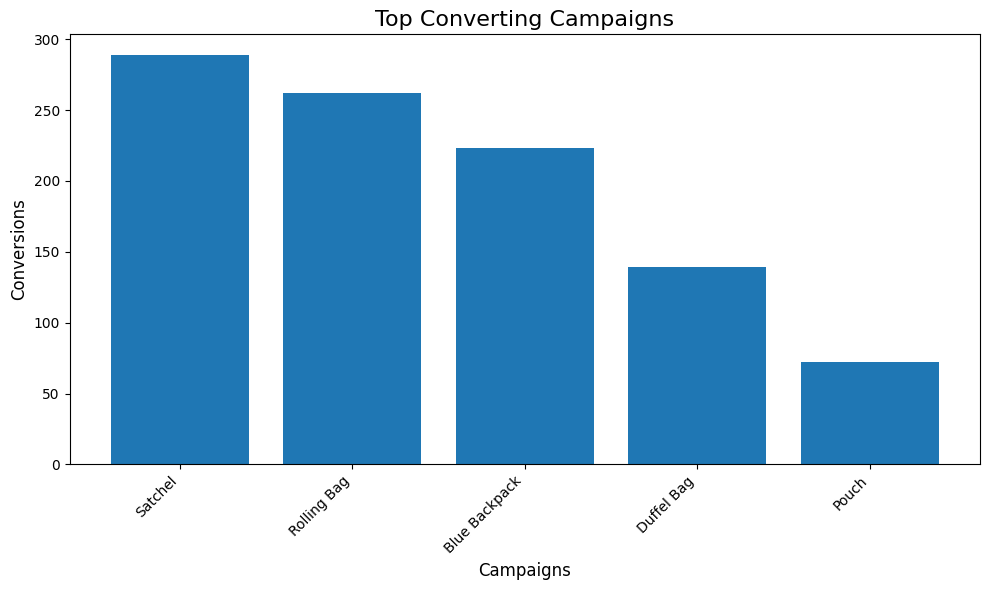

In [36]:
# Select the top nine converting campaigns
top_converting_campaigns = results_df.nlargest(9, 'Conversions')

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_converting_campaigns['Campaign'], top_converting_campaigns['Conversions'])
plt.title('Top Converting Campaigns', fontsize=16)
plt.xlabel('Campaigns', fontsize=12)
plt.ylabel('Conversions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#Summary of Results:
###Overall Conversion Rates:

* Conversion rates across campaigns varied from **2.00% to 7.79%**, indicating differing levels of success in converting audience engagement into desired actions.

* The highest conversion rate (**7.79%**) was achieved by the Affiliate campaign via Clickbank (**Pouch**), demonstrating strong alignment between campaign strategy and audience.

###Cost-Effectiveness of Conversions (CPA):

* Cost Per Acquisition (CPA) ranged from **5.65 to 9.79**.

* The Display campaign via Retargeting (**Satchel**) had the lowest CPA (**$5.65**), making it the most cost-effective in converting impressions into actions.

###Revenue & Profitability:

Total revenue and profit outcomes highlighted the success of campaigns not only in driving conversions but also in maximizing financial returns:

* The Display campaign via Retargeting (**Satchel**) generated the highest profit (**$25,760.38**), benefiting from a combination of low CPA and high revenue per conversion (**157.00**).

* The Paid Social campaign via Instagram (**Duffel Bag**) yielded **$21,733.35** in revenue with a solid profit of **10,432.0**1, despite a moderate conversion rate (**4.62%**).

###Budget Utilization:

* Campaign budgets were utilized effectively, with actual costs closely aligned with allocated budgets.

* The Paid Search campaign via Bing (**Satchel**) had the highest allocated budget (**$2,906.00**) and was leveraged well, generating **20,101.95** in profit with a conversion rate of **5.61%**.

#Recommendation

* Monitor campaign performance in real time to adjust spending dynamically based on actual performance trends.

* Reinvest gains from high-performing campaigns with excess capacity for growth.
Evaluate underperforming campaigns to fine-tune strategies or reallocate remaining budget.

##Next Steps:

* Conduct A/B testing on campaigns with lower-than-average conversion rates to identify optimization opportunities.

* Increase investment in campaigns with demonstrated high ROI, such as Display via Retargeting.

* Review performance metrics regularly to ensure continuous improvement in both conversion rates and profitability.

By aligning campaign strategies with the findings of this analysis, BUHI Supply Co. can maximize conversions and financial outcomes more effectively.